# Palkkajakaumien tarkastelua

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle
import gym

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.5 valittaa paljon)
import warnings
warnings.filterwarnings('ignore')

pop_size=1_000

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


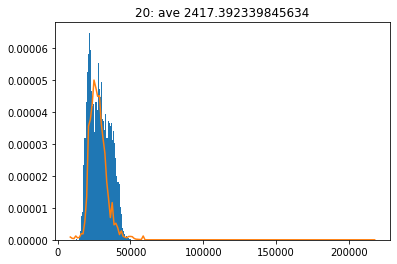

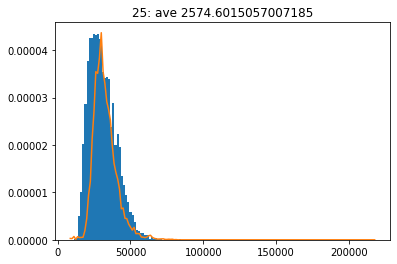

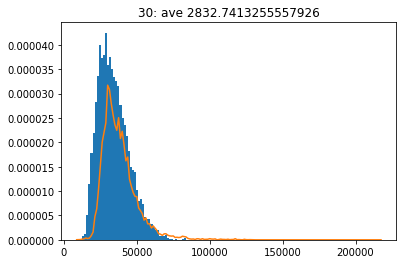

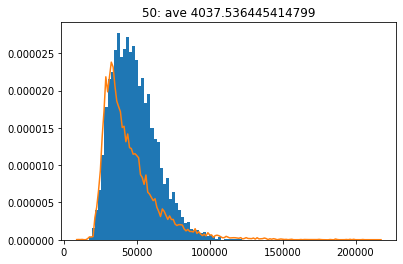

In [2]:
ben=gym.make('unemployment-v1',kwargs={})

n=1000
m=0

sal20=np.zeros((6*n,1))
sal25=np.zeros((6*n,1))
sal30=np.zeros((6*n,1))
sal50=np.zeros((6*n,1))

p=np.arange(700,17500,100)*12.5
palkka20=np.array([10.3,5.6,4.5,14.2,7.1,9.1,22.8,22.1,68.9,160.3,421.6,445.9,501.5,592.2,564.5,531.9,534.4,431.2,373.8,320.3,214.3,151.4,82.3,138.0,55.6,61.5,45.2,19.4,32.9,13.1,9.6,7.4,12.3,12.5,11.5,5.3,2.4,1.6,1.2,1.2,14.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
palkka25=np.array([12.4,11.3,30.2,4.3,28.5,20.3,22.5,23.7,83.3,193.0,407.9,535.0,926.5,1177.1,1540.9,1526.4,1670.2,1898.3,1538.8,1431.5,1267.9,1194.8,1096.3,872.6,701.3,619.0,557.2,465.8,284.3,291.4,197.1,194.4,145.0,116.7,88.7,114.0,56.9,57.3,55.0,25.2,24.4,20.1,25.2,37.3,41.4,22.6,14.1,9.4,6.3,7.5,8.1,9.0,4.0,3.4,5.4,4.1,5.2,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
palkka30=np.array([1.0,2.0,3.0,8.5,12.1,22.9,15.8,21.8,52.3,98.2,295.3,392.8,646.7,951.4,1240.5,1364.5,1486.1,1965.2,1908.9,1729.5,1584.8,1460.6,1391.6,1551.9,1287.6,1379.0,1205.6,1003.6,1051.6,769.9,680.5,601.2,552.0,548.3,404.5,371.0,332.7,250.0,278.2,202.2,204.4,149.8,176.7,149.0,119.6,76.8,71.4,56.3,75.9,76.8,58.2,50.2,46.8,48.9,30.1,32.2,28.8,31.1,45.5,41.2,36.5,18.1,11.6,8.5,10.2,4.3,13.5,12.3,4.9,13.9,5.4,5.9,7.4,14.1,9.6,8.4,11.5,0.0,3.3,9.0,5.2,5.0,3.1,7.4,2.0,4.0,4.1,14.0,2.0,3.0,1.0,0.0,6.2,2.0,1.2,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
palkka50=np.array([2.0,3.1,2.4,3.9,1.0,1.0,11.4,30.1,29.3,34.3,231.9,341.9,514.4,724.0,1076.8,1345.2,1703.0,1545.8,1704.0,1856.1,1805.4,1608.1,1450.0,1391.4,1338.5,1173.2,1186.3,1024.8,1105.6,963.0,953.0,893.7,899.8,879.5,857.0,681.5,650.5,579.2,676.8,498.0,477.5,444.3,409.1,429.0,340.5,297.2,243.1,322.5,297.5,254.1,213.1,249.3,212.1,212.8,164.4,149.3,158.6,157.4,154.1,112.7,93.4,108.4,87.3,86.7,82.0,115.9,66.9,84.2,61.4,43.7,58.1,40.9,73.9,50.0,51.6,25.7,43.2,48.2,43.0,32.6,21.6,22.4,36.3,28.3,19.4,21.1,21.9,21.5,19.2,15.8,22.6,9.3,14.0,22.4,14.0,13.0,11.9,18.7,7.3,21.6,9.5,11.2,12.0,18.2,12.9,2.2,10.7,6.1,11.7,7.6,1.0,4.7,8.5,6.4,3.3,4.6,1.2,3.7,5.8,1.0,1.0,1.0,1.0,3.2,1.2,3.1,2.2,2.3,2.1,1.1,2.0,2.1,2.2,4.6,2.2,1.0,1.0,1.0,0.0,3.0,1.2,0.0,8.2,3.0,1.0,1.0,2.1,1.2,3.2,1.0,5.2,1.1,5.2,1.0,1.2,2.3,1.0,3.1,1.0,1.0,1.1,1.6,1.1,1.1,1.0,1.0,1.0,1.0])

for g in range(6):
    for k in range(n):
        ben.compute_salary_TK(group=g)
        sal20[m]=ben.salary[20]
        sal25[m]=ben.salary[25]
        sal30[m]=ben.salary[30]
        sal50[m]=ben.salary[50]
        m=m+1

def kuva(sal,ika,p,palkka):
    plt.hist(sal,bins=50,density=True)
    ave=np.mean(sal)/12
    plt.title('{}: ave {}'.format(ika,ave))
    plt.plot(p,palkka/sum(palkka)/2000)
    plt.show()


kuva(sal20,20,p,palkka20)
kuva(sal25,25,p,palkka25)
kuva(sal30,30,p,palkka30)
kuva(sal50,50,p,palkka50)


Group 0:


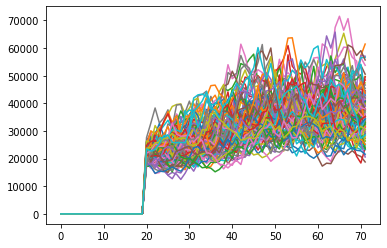

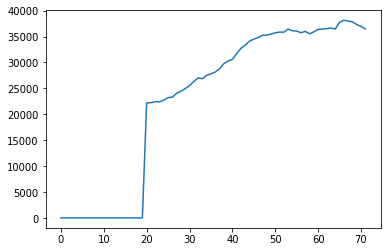

Group 1:


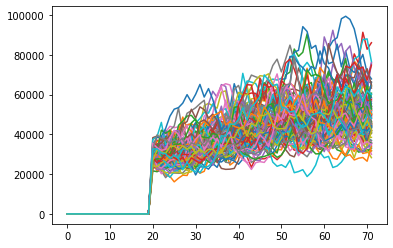

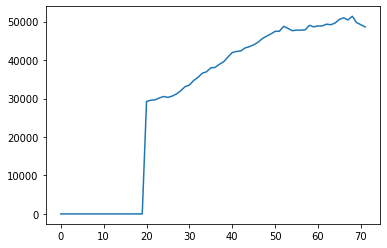

Group 2:


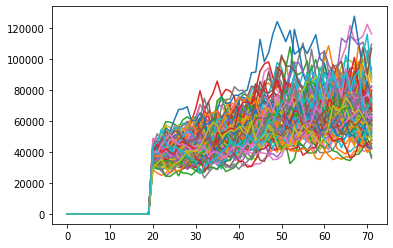

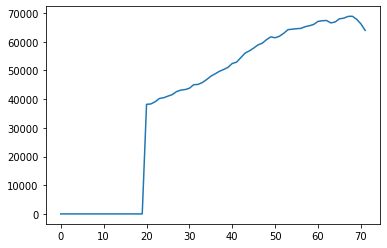

Group 3:


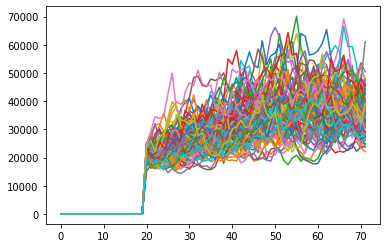

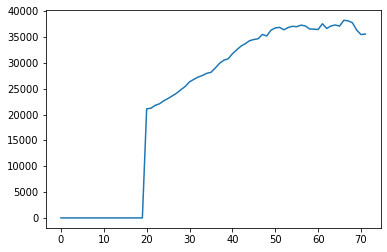

Group 4:


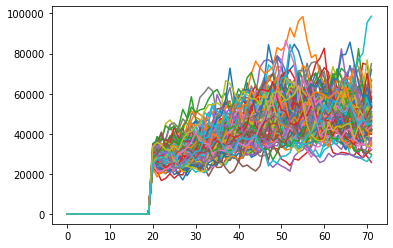

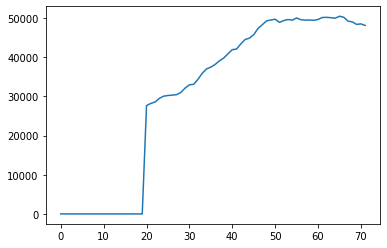

Group 5:


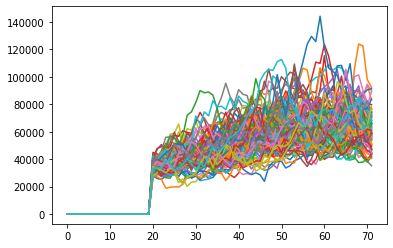

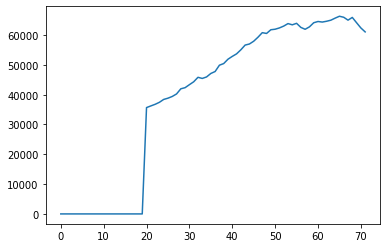

In [5]:
ben=gym.make('unemployment-v1',kwargs={})

n=100

for g in range(6):
    print('Group {}:'.format(g))
    sal=np.zeros((n,72))
    for k in range(n):
        ben.compute_salary_TK(group=g)
        sal[k,:]=ben.salary
        plt.plot(ben.salary)

    plt.show()
    
    plt.plot(np.mean(sal,axis=0))
    plt.show()

In [4]:
import random

random.choices([0,1,2],weights=[0.3,0.3,0.4])


[2]